In [1]:
from depth_edit_zoe import depth_edit_rotate, visualize_img, plot_img
import os
import numpy as np

curr_dir = '../data/test/a_sunflower_in_the_garden_sunflower/'

/home/guerrero/miniconda/envs/diffusionhandles/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-13 18:08:14.919644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 18:08:14.919701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 18:08:14.920559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 18:08:14.927087: I tensorflow/core/platform/cpu_feature_guard.cc:182] This

img_size [384, 512]


Using cache found in /home/guerrero/.cache/torch/hub/intel-isl_MiDaS_master
/home/guerrero/miniconda/envs/diffusionhandles/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


getting points
computed points
512
512
512
512


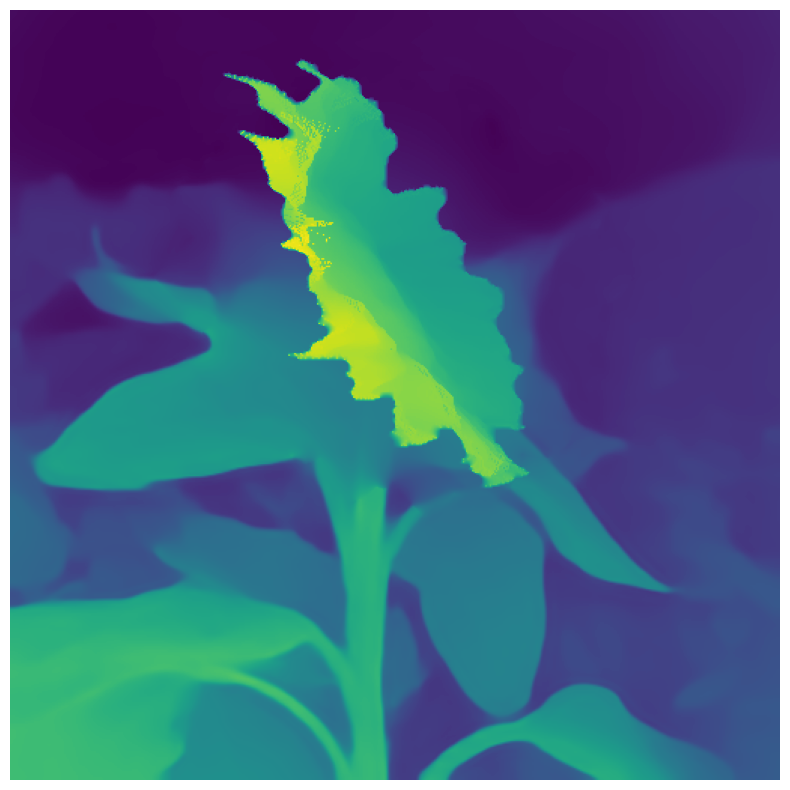

In [2]:
x, y, z = 0.0, 0.0, 0.0

axis = np.array([0.0, 1.0, 0.0]) 

angle = 55

transformed_depth, target_mask, correspondences = depth_edit_rotate(curr_dir, axis, angle, x, y, z)

plot_img(transformed_depth)

In [4]:
transform_dir = 'transform_' + str(x) + '_' + str(y) + '_' + str(z) + '_' + str(angle) + '/'
transform_dir = curr_dir + transform_dir

if not os.path.exists(os.path.dirname(transform_dir)):
    os.makedirs(os.path.dirname(transform_dir))

visualize_img(transformed_depth, transform_dir + 'transformed_depth')
visualize_img(target_mask, transform_dir + 'target_mask')
np.save(transform_dir + 'positions.npy', correspondences)